In [1]:
# Import necessary libraries for text preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('C:/Users/ranja/Downloads/spam.csv')

In [3]:
def check_data(df,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(df.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(df.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(df.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(df.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(df.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)
    
check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
--------------------     Data Shape     --------------------
(5572, 5)

--------------------  The First 5 Data  --------------------
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham 

In [4]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

# rename the columns 
df.rename(columns= {'v1':'target','v2':'text'},inplace = True)

In [5]:
#check for duplicate
df.duplicated().sum()

403

In [6]:
#Drop duplicated values
df=df.drop_duplicates()
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.shape

(5169, 2)

In [8]:
avg_words_len=round(sum([len(i.split()) for i in df['text']])/len(df['text']))
s = set()
for sent in df['text']:
    for word in sent.split():
        s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


In [9]:
# apply label incoder ham = 0, spam = 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


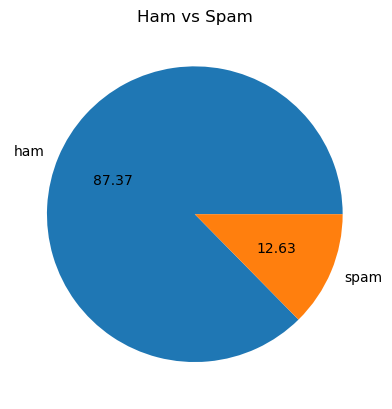

In [10]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.title('Ham vs Spam')
plt.show()

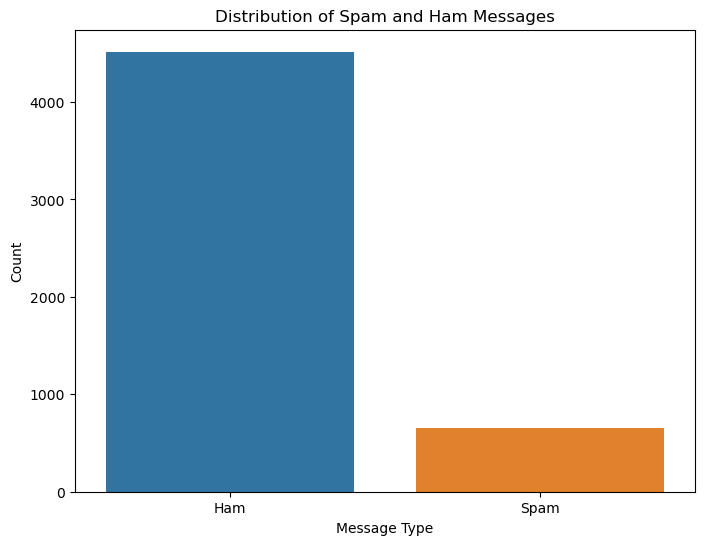

In [11]:
# Data Visualization
# Create a bar plot to visualize the distribution of spam and ham messages

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

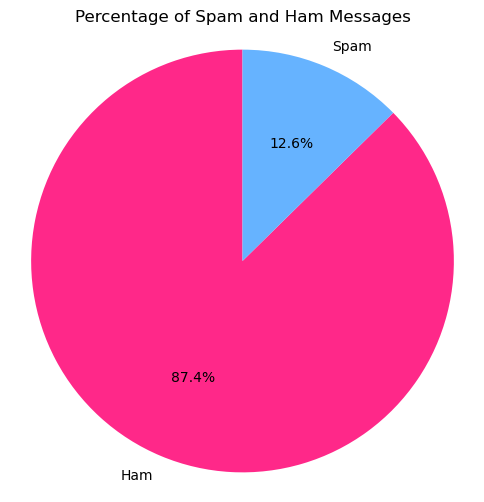

In [12]:
# Count the number of spam and ham messages
spam_count = df['target'].value_counts()[1]
ham_count = df['target'].value_counts()[0]

# Create a pie chart to show the percentage of spam and ham messages
plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2889', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Axes: title={'center': 'spam'}, xlabel='length', ylabel='Count'>

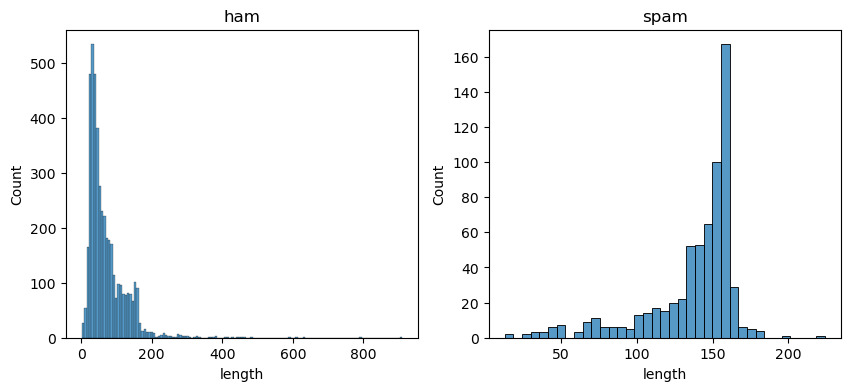

In [13]:
df['length'] = df['text'].apply(len)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('ham')
sns.histplot(df[df['target']==0]['length'])
plt.subplot(1,2,2)
plt.title('spam')
sns.histplot(df[df['target']==1]['length'])

In [14]:
# Feature Engineering
# number of sentences

df['sentences_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# number of words

df['words_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# number of characters

df['characters_count'] = df['text'].apply(len)

df.head()

,target,text,length,sentences_count,words_count,characters_count
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,111
1,0,Ok lar... Joking wif u oni...,29,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,155
3,0,U dun say so early hor... U c already then say...,49,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,61


In [15]:
df[df.target==1].describe()

,target,length,sentences_count,words_count,characters_count
count,653.0,653.000000,653.000000,653.000000,653.000000
mean,1.0,137.891271,2.970904,27.667688,137.891271
std,0.0,30.137753,1.488425,7.008418,30.137753
min,1.0,13.000000,1.000000,2.000000,13.000000
25%,1.0,132.000000,2.000000,25.000000,132.000000
50%,1.0,149.000000,3.000000,29.000000,149.000000
75%,1.0,157.000000,4.000000,32.000000,157.000000
max,1.0,224.000000,9.000000,46.000000,224.000000


In [16]:
df[df.target==0].describe()

,target,length,sentences_count,words_count,characters_count
count,4516.0,4516.000000,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,1.820195,17.123782,70.459256
std,0.0,56.358207,1.383657,13.493970,56.358207
min,0.0,2.000000,1.000000,1.000000,2.000000
25%,0.0,34.000000,1.000000,8.000000,34.000000
50%,0.0,52.000000,1.000000,13.000000,52.000000
75%,0.0,90.000000,2.000000,22.000000,90.000000
max,0.0,910.000000,38.000000,220.000000,910.000000


<Axes: xlabel='characters_count', ylabel='Count'>

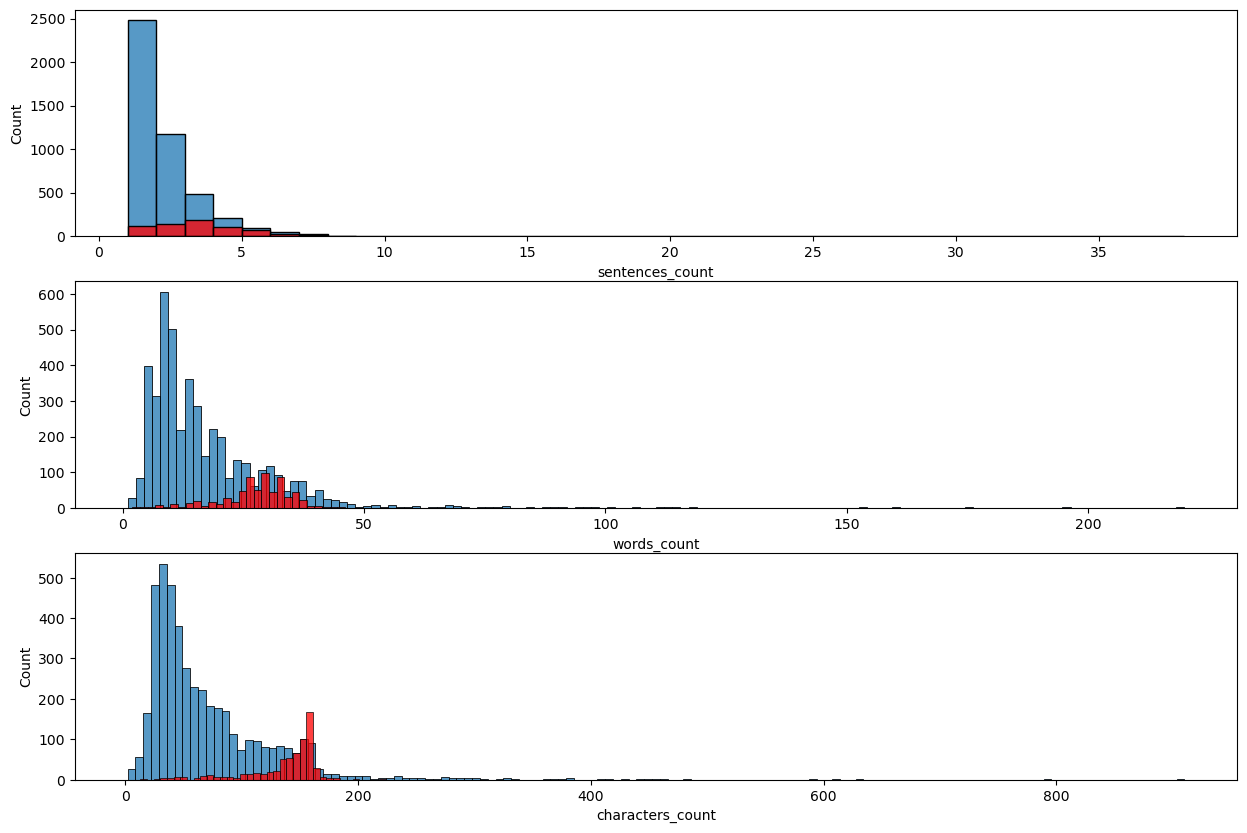

In [17]:
_, ax=plt.subplots(3,1,figsize=(15,10))

sns.histplot(df[df.target==0]['sentences_count'], ax=ax[0], binwidth=1)
sns.histplot(df[df.target==1]['sentences_count'], color='red', ax=ax[0], binwidth=1)

sns.histplot(df[df.target==0]['words_count'], ax=ax[1])
sns.histplot(df[df.target==1]['words_count'], color='red', ax=ax[1])

sns.histplot(df[df.target==0]['characters_count'], ax=ax[2])
sns.histplot(df[df.target==1]['characters_count'], color='red', ax=ax[2])

<Axes: >

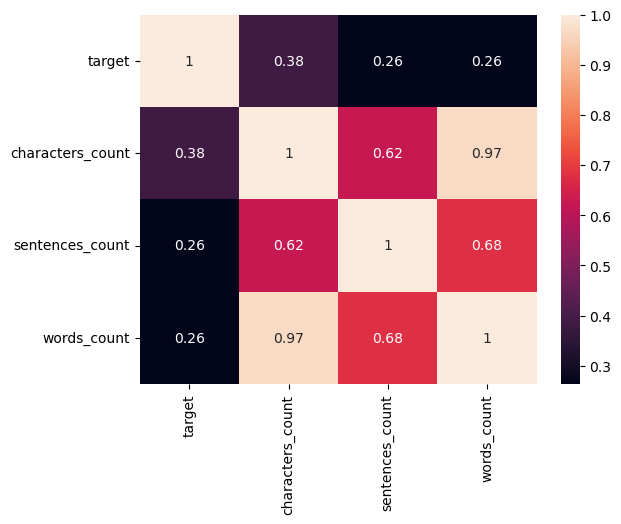

In [18]:
sns.heatmap(df[['target','characters_count','sentences_count','words_count']].corr(),annot=True)

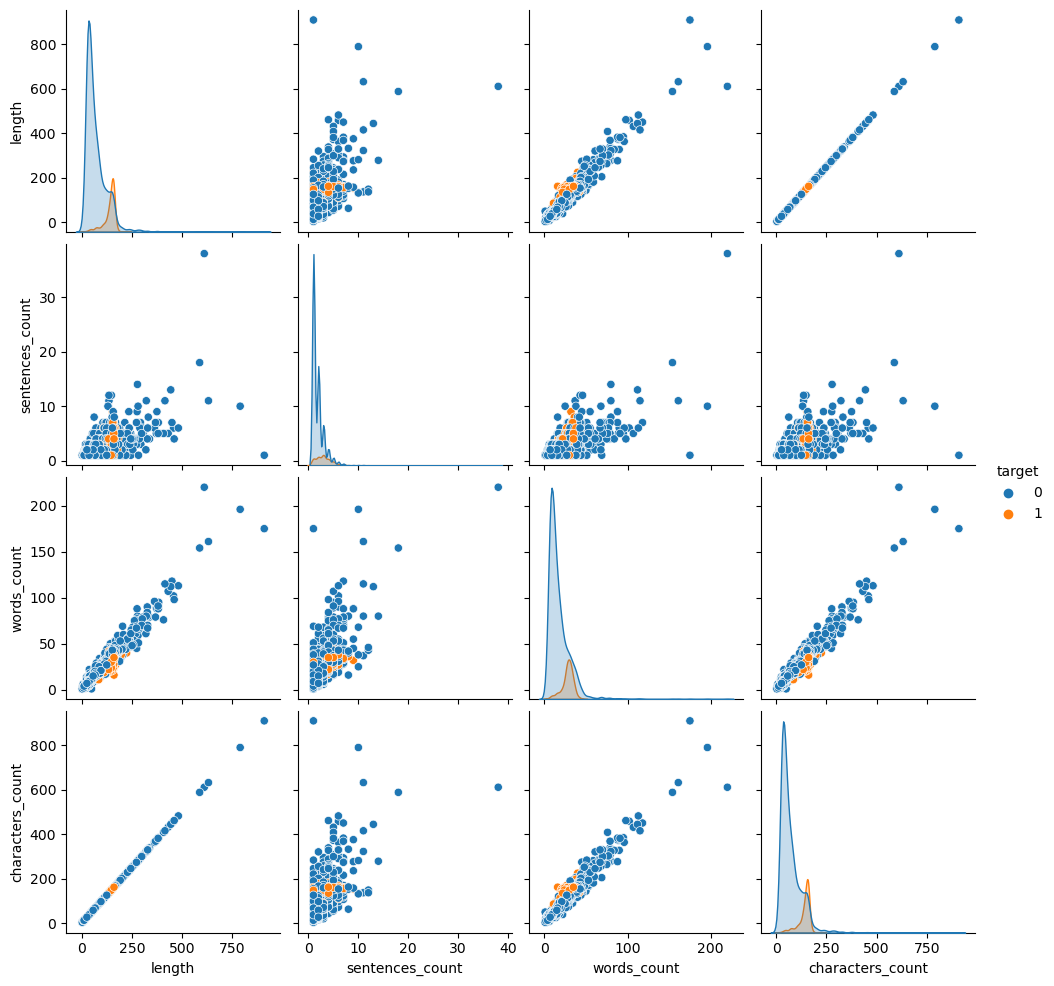

In [19]:
sns.pairplot(df, hue='target')

In [20]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y.copy()
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    

df['transformed_text'] = df['text'].apply(transform_text)

df.head()

,target,text,length,sentences_count,words_count,characters_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,61,nah think goe usf live around though


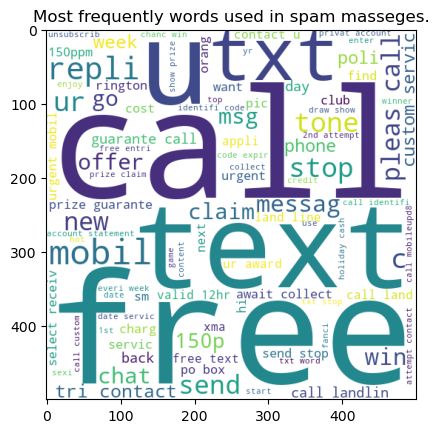

In [21]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))
plt.title("Most frequently words used in spam masseges.")
plt.imshow(spam_wc)

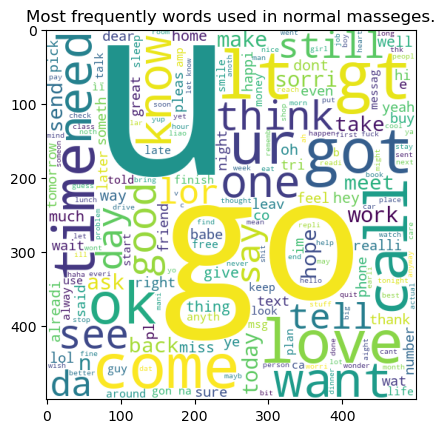

In [22]:
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))
plt.title("Most frequently words used in normal masseges.")
plt.imshow(spam_wc)

In [23]:
# Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 2500)

x = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

print('gaussian Naive Bayes')
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print("*"*25)
print('Multinomial Naive Bayes') 
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print("*"*25)
print('bernoulli naive Bayes')
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

gaussian Naive Bayes
0.8500967117988395
0.45901639344262296
*************************
Multinomial Naive Bayes
0.9680851063829787
1.0
*************************
bernoulli naive Bayes
0.9748549323017408
0.9739130434782609


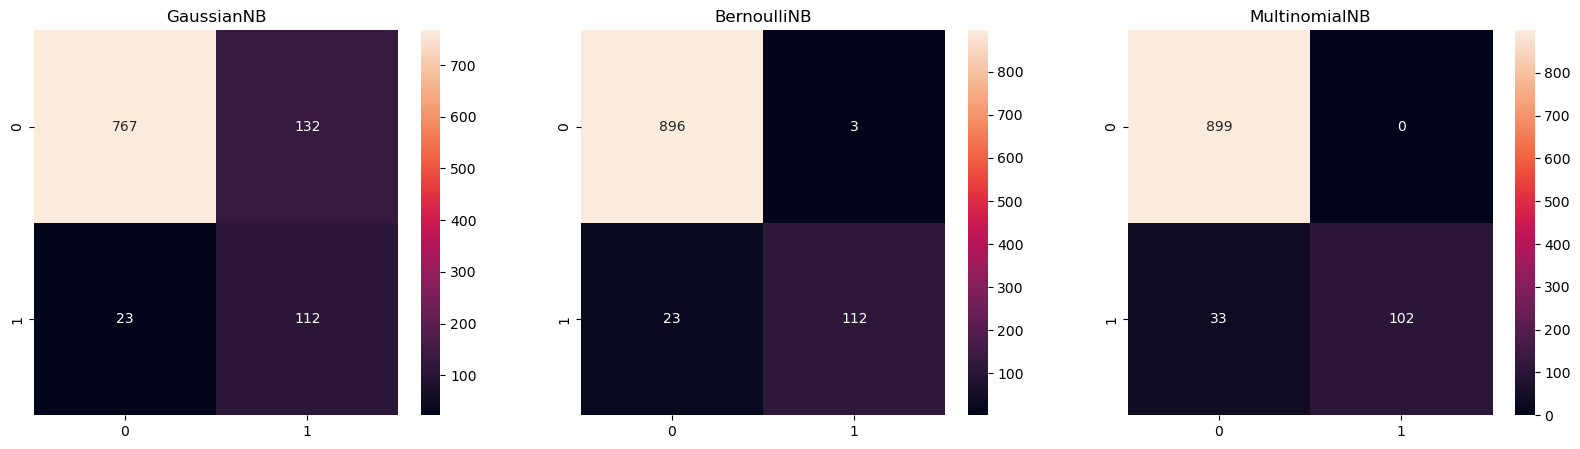

In [24]:
def test_models(models):
    
    scores = {'model': [],
             'accracy score': [],
             'precision score': []}

    _, ax = plt.subplots(1, len(models), figsize=(20,5))

    for index, model in enumerate(models):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        scores['model'].append(type(model).__name__)
        scores['accracy score'].append(accuracy)
        scores['precision score'].append(precision)

        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax[index], fmt=".0f")
        ax[index].set_title(type(model).__name__)

    scores = pd.DataFrame(scores)
    return scores

models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [26]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912959,1.000000
2,NB,0.968085,1.000000
5,RF,0.964217,0.990000
8,ETC,0.969052,0.972477
0,SVC,0.969052,0.947826
9,GBDT,0.938104,0.927711
6,AdaBoost,0.957447,0.902655
4,LR,0.941973,0.878788
7,BgC,0.944874,0.830508
3,DT,0.911025,0.731183


In [27]:
# Model Training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
# Model Evaluation and Prediction

prediction_on_training_data = model.predict(x_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.9692865779927449


In [29]:
prediction_on_test_data = model.predict(x_test)
accuracy_on_test_data = accuracy_score(y_test,prediction_on_test_data)

print("Accuracy on test data:",accuracy_on_test_data)

Accuracy on test data: 0.9400386847195358


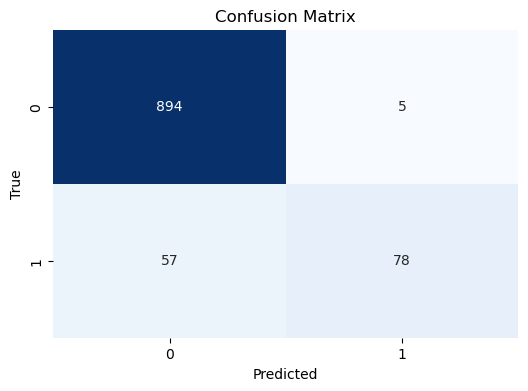

In [30]:
# Data visualization - Confusion Matrix

cm = confusion_matrix(y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
#voting classifier
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('knc',knc),('nb',mnb),('rfc',rfc)])

voting.fit(x_train,y_train)

VotingClassifier(estimators=[('knc', KNeighborsClassifier()),
                             ('nb', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))])

In [32]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9593810444874274
Precision 1.0


In [33]:
X = df['text']
y = df['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Creating the SVM Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

grid_params_svm = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0],
}

model_svm = GridSearchCV(pipeline, grid_params_svm, cv=5, scoring='accuracy')

model_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5,
                                           5.0, 10.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             scoring='accuracy')

In [35]:
# Create a function to perform classification metrics
def show_metrics(y_true, y_pred, grid_search=None):
    from sklearn.metrics import (classification_report,
                                 confusion_matrix,
                                 ConfusionMatrixDisplay)
    
    print('-' * 20)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    
    if grid_search:
        print('-' * 20)
        print(grid_search.best_params_)

# SVM metrics
best_svm = model_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

show_metrics(y_test, y_pred_svm, model_svm)

--------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.97      0.90      0.93       208

    accuracy                           0.98      1551
   macro avg       0.98      0.95      0.96      1551
weighted avg       0.98      0.98      0.98      1551

[[1337    6]
 [  21  187]]
--------------------
{'classifier__C': 5.0, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}


In [36]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# Creating the SVM Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

grid_params_svm = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0],
}

model_svm = GridSearchCV(pipeline, grid_params_svm, cv=5, scoring='accuracy')

model_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5,
                                           5.0, 10.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             scoring='accuracy')

In [37]:
# TF-IDF Vectorization

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

grid_params_nb = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0]
}

model_nb = GridSearchCV(pipeline, grid_params_nb, cv=5, scoring='accuracy')

model_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0,
                                               2.5, 5.0, 10.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             scoring='accuracy')

In [38]:
# Metrics
# NB metrics

best_nb = model_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_nb)

0.9800128949065119

In [39]:
metrics.confusion_matrix(y_test, y_pred_nb)

array([[1338,    5],
       [  26,  182]], dtype=int64)

In [40]:
print("Recall:", metrics.recall_score(y_test, y_pred_nb))
print("Precision:", metrics.precision_score(y_test, y_pred_nb))

Recall: 0.875
Precision: 0.9732620320855615


In [41]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# Multinomial Naive Bayes Model
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [42]:
# Preprocess the test data and make predictions
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy*100

94.64861379754996

In [43]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1343    0]
 [  83  125]]


In [44]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1343
           1       1.00      0.60      0.75       208

    accuracy                           0.95      1551
   macro avg       0.97      0.80      0.86      1551
weighted avg       0.95      0.95      0.94      1551



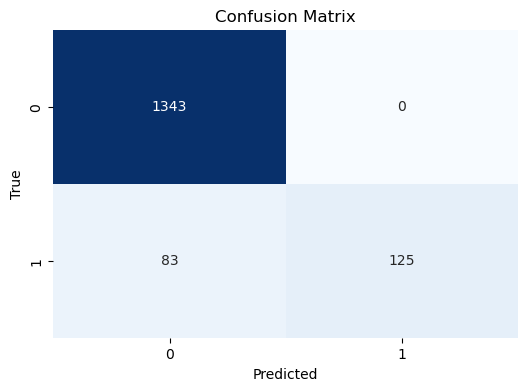

In [45]:
# Data visualization - Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
couvec = CountVectorizer()
couvec.fit(X_train)

CountVectorizer()

In [47]:
trained_features = couvec.get_feature_names_out()
print("CountVectorizer:", len(X_train))
print("Trained features:", X_train[1:10])

CountVectorizer: 3618
Trained features: 957                            Welp apparently he retired
3422    Had your mobile 10 mths? Update to latest Oran...
5187                                   WHAT TIME U WRKIN?
1290    Eat jap done oso aft ur lect wat... ÌÏ got lec...
4716    K will do, addie &amp; I are doing some art so...
3855                     I'm ok. Will do my part tomorrow
907     I.ll give her once i have it. Plus she said gr...
2338                            Alright, see you in a bit
1349    FREE2DAY sexy St George's Day pic of Jordan!Tx...
Name: text, dtype: object


In [48]:
# tokenized train documents

dtm_train = couvec.fit_transform(X_train)
dtm_test = couvec.transform(X_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1551, 7165)


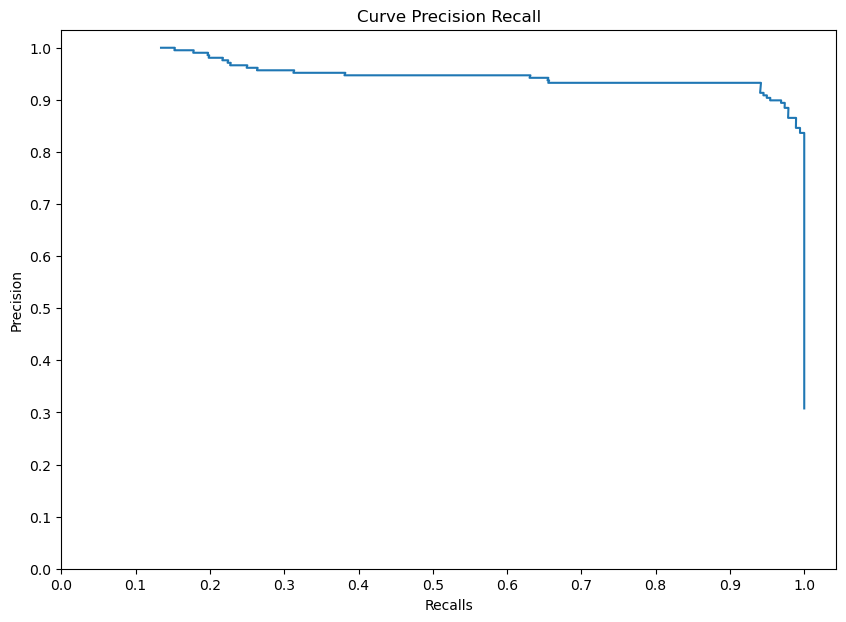

In [49]:
import numpy as np
nb = MultinomialNB()
nb.fit(dtm_train, y_train)
labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, labels_prob)
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precision")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curve Precision Recall")
plt.show()

In [50]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, Y_train, Y_test = train_test_split(df.text,df.target,test_size=0.2)
trans_train = couvec.fit_transform(X_train)
trans_test = couvec.transform(X_test)

In [51]:
# SVC
svc = SVC(C=1850, gamma=0.0001, probability=True)
svcModel = svc.fit(trans_train, Y_train)
svc_pred = svcModel.predict(trans_test)
conf_matrix = confusion_matrix(Y_test, svc_pred)
class_report1 = classification_report(Y_test, svc_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[904   3]
 [ 14 113]]


In [52]:
print('Classification Report:')
print(class_report1)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       907
           1       0.97      0.89      0.93       127

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [53]:
# Random Forest
rf = RandomForestClassifier()
rfModel = rf.fit(trans_train, Y_train)
rf_pred = rfModel.predict(trans_test)
conf_matrix = confusion_matrix(Y_test, rf_pred)
class_report2 = classification_report(Y_test, rf_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[907   0]
 [ 28  99]]


In [54]:
print('Classification Report:')
print(class_report2)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       907
           1       1.00      0.78      0.88       127

    accuracy                           0.97      1034
   macro avg       0.99      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [55]:
# MLPClassifier
mlp = MLPClassifier()
mlpModel = mlp.fit(trans_train, Y_train)
mlp_pred = mlp.predict(trans_test)

print('Accuracy:',metrics.accuracy_score(Y_test, mlp_pred))

Accuracy: 0.9845261121856866


In [56]:
conf_matrix = confusion_matrix(Y_test, mlp_pred)
class_report3 = classification_report(Y_test, mlp_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[906   1]
 [ 15 112]]


In [57]:
print('Classification Report:')
print(class_report3)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       907
           1       0.99      0.88      0.93       127

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [58]:
# Model Prediction
# Define the input text
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

# Preprocess the input text
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)

# Make a prediction
prediction = clf.predict(input_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"

# Print the result
print(f"Prediction: {result}")

Prediction: Spam


In [59]:
# Model Predictions

# Define the input text
input_mail = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

# Preprocess the input text
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)

# Make a prediction
prediction = clf.predict(input_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"

# Print the result
print(f"Prediction: {result}")

Prediction: Ham


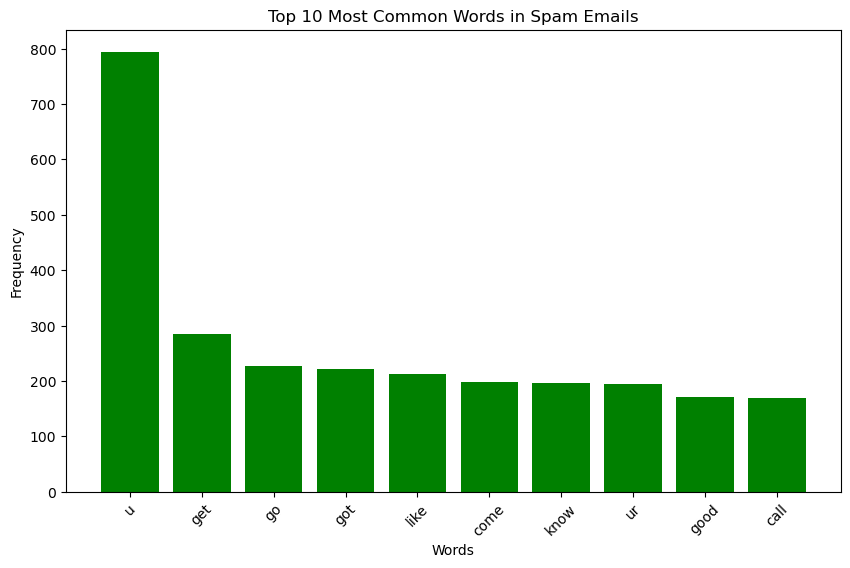

In [60]:
# Data visualization - Top 10 Most Common Words in Spam Emails

from collections import Counter
stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['target'] == 0]['text']).split()
ham_words = " ".join(df[df['target'] == 1]['text']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

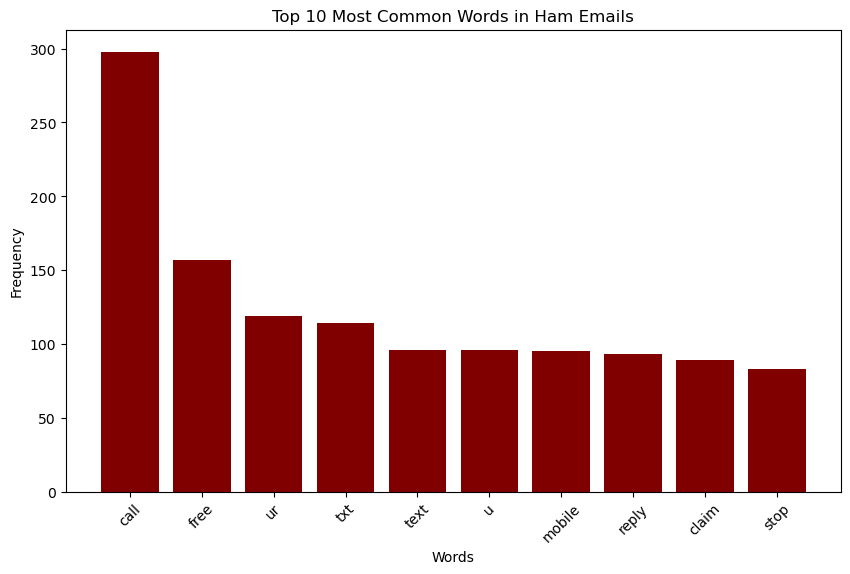

In [61]:
# Data visualization - Top 10 Most Common Words in Ham Emails

ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='maroon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()